In [3]:
#打开数据集
import numpy as np
import scipy.io as scio
import matplotlib as mpl
import matplotlib.pyplot as plt

file_path ="C:/Users/70951/Desktop/mnist-original.mat"
mnist = scio.loadmat(file_path)
mnist.keys()

#数据整理
X, y = mnist["data"], mnist["label"]
X = X.transpose()
X.shape
y = y.transpose()
y.shape
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train=y_train.ravel()
y_test=y_test.ravel()

In [4]:
#梯度下降分类——模型训练

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss='hinge', penalty='l1', max_iter=5, tol=1e-3, random_state=405)
sgd_clf.fit(X_train, y_train)

E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=405, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Ma

Text(0.5, 1.0, 'SGD:Confusion_matrix')

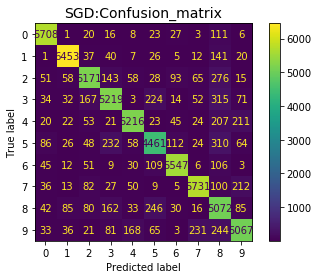

In [5]:
# 验证
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")# 每一次验证的正确概率输出
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3) #使用交叉验证输出预测值
#结果：array([0.87685, 0.8673 , 0.8701 ])，超参数max_iter=1000
#结果：array([0.8363, 0.8468, 0.8527])，超参数max_iter=1        欠拟合
#结果：array([0.8725 , 0.87225, 0.8502 ])，超参数max_iter=10
#结果：array([0.8886 , 0.88775, 0.8921 ])，超参数max_iter=10, penalty=1
#结果：array([0.86285, 0.8832 , 0.84545])，超参数max_iter=10, penalty=elasticnet
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx_display = ConfusionMatrixDisplay(conf_mx, display_labels='0123456789')
conf_mx_display.plot(values_format='.4g')
plt.title("SGD:Confusion_matrix", fontsize=14)


In [6]:
#测试其他参数
sgd_clf = SGDClassifier(loss='hinge', penalty='l1', max_iter=1, tol=1e-3, random_state=405)
sgd_clf.fit(X_train, y_train)
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")# 每一次验证的正确概率输出

E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.89315, 0.89355, 0.8999 ])

In [7]:
#测试其他参数
sgd_clf = SGDClassifier(loss='hinge', penalty='l1', max_iter=10, tol=1e-3, random_state=405)
sgd_clf.fit(X_train, y_train)
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")# 每一次验证的正确概率输出

E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.8886 , 0.88775, 0.8921 ])

In [9]:
#测试其他参数，此过程测试过max_iter=100，时间太久跑不动，所以转变测试参数为罚数
sgd_clf = SGDClassifier(loss='hinge', penalty='elasticnet', max_iter=1, tol=1e-3, random_state=405)
sgd_clf.fit(X_train, y_train)
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")# 每一次验证的正确概率输出

E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.8689, 0.852 , 0.8773])

In [10]:
#测试其他参数
sgd_clf = SGDClassifier(loss='hinge', penalty='elasticnet', max_iter=5, tol=1e-3, random_state=405)
sgd_clf.fit(X_train, y_train)
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")# 每一次验证的正确概率输出

E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.85635, 0.8742 , 0.8724 ])

In [11]:
#测试其他参数
sgd_clf = SGDClassifier(loss='hinge', penalty='elasticnet', max_iter=, tol=1e-3, random_state=405)
sgd_clf.fit(X_train, y_train)
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")# 每一次验证的正确概率输出

E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.86285, 0.8832 , 0.84545])

In [12]:
#测试其他参数
sgd_clf = SGDClassifier(loss='hinge', penalty='l2', max_iter=1, tol=1e-3, random_state=405)
sgd_clf.fit(X_train, y_train)
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")# 每一次验证的正确概率输出

E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.8363, 0.8468, 0.8527])

In [13]:
#测试其他参数
sgd_clf = SGDClassifier(loss='hinge', penalty='l2', max_iter=5, tol=1e-3, random_state=405)
sgd_clf.fit(X_train, y_train)
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")# 每一次验证的正确概率输出

E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.86115, 0.8371 , 0.8625 ])

In [14]:
#测试其他参数
sgd_clf = SGDClassifier(loss='hinge', penalty='l2', max_iter=10, tol=1e-3, random_state=405)
sgd_clf.fit(X_train, y_train)
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")# 每一次验证的正确概率输出

E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.8725 , 0.87225, 0.8502 ])